© 2018 Suzy Beeler. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

This exercise was generated from a Jupyter notebook. You can download the notebook [here](inferring_p_heads.ipynb).
___

# Objective 

This tutorial will serve as a brief introduction to Bayesian inference, a way in which was can estimate the probability of different parameters values from our data. As an example, we will work with a simulated coin, which has probability $0 \leq p \leq 1$ of revealing heads. 

# Bayes' Theorem

Bayes' Theorem is given by

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)},$$

where $A$ and $B$ are certain events that respectively have probability $P(A)$ and $P(B)$ of occurring. Additionally, $P(A|B)$ (read as "probability of $A$ given $B$") is defined as the probability that $A$ occurs *given* that event $B$ has already occurred. This is also known as a *conditional probability* since event $A$ is conditional on event $B$. In the context of scientific endeavors, we are interested in the probability that a model, $M$ (i.e. a given parameter value or set of parameter values), is correct *given* our data, $D$. Couched in the formulation of Bayes' Theorem, we have

$$ P(M|D) = \frac{P(D|M)P(M)}{P(D)}. $$

Each of these four components of Bayes' Theorem has their own name and interpretation:
- $P(M|D)$ is the posterior probability. As scientists, this is what we are ultimately trying to assess. That is, we have a certain model as a hypothesis and we would like to quantify the probability that our model is correct given the data we have collected.

- $P(D|M)$ is the likelihood. Given a clearly articulated model, we should be able to compute the probability (i.e. likelihood) that our data could occur. 

- $P(M)$ is the prior probability. This is our best guess of the model's parameter value(s) *prior* to taking any data. 

- $P(D)$ is the evidence. This is the probability of the data occurring, independent of any hypothesis. This is a hard (if not impossible) thing to compute. But this term can just be considered a normalization constant, since it doesn't contain the model, $M$, which is the value we ultimately wish to assess. 

After disregarding the evidence term, we are left with

$$P(M|D) \propto P(D|M)P(M).$$

Let's now put Bayes' Theorem to use with the case of an unbiased coin.

# Simulating an unbiased coin

In [1]:
# Import the necessary modules
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# For pretty plots
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 14, 'axes.titlesize': 14, \
    'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
sns.set(rc=rc)

To simulate a coin, we will make use of numpy's `random.random()` function that produces a random number between $0$ and $1$. Let's see it in action by printing a few random numbers:

In [2]:
for i in range(10):
    print(np.random.random())

0.03352216365659366
0.43227929761884987
0.10309690367895641
0.9581004918866887
0.27164666247981095
0.5202728001311903
0.42885589811713565
0.17509711245759363
0.18805845486160233
0.547586941723625


We can now use these randomly generated numbers to simulate the process of flipping a coin, where there is a chance $p_{head}$ of getting heads and chance $1-p_{head}$ of getting tails. Below, we define a function `coin_flip()` that will enact this siumultion, returning `True` for heads and `False` for tails. By default, we will have the coin be fair (i.e. $p_{head} = 0.5$), but we can change this later.

In [3]:
def coin_flip(p_head=0.5):
    rand_num = np.random.random()
    
    return rand_num < p_head

Let's test out this `coin_flip()` function by priting the results of a few flips:

In [4]:
for i in range(10):
    print(coin_flip())

True
True
False
True
False
True
False
False
False
False


We see that our `coin_flip()` function gives a mix of heads and tail as expected, and thus seems to be working well. 

# Formulating coin flips with Bayes' Theorem 

## Creating the 'data'

In [43]:
# number of coin flips to be done
n_flips = 10

# probability of getting a head
p_head = 0.5

# initilize number of heads
n_heads = 0

# for n_flip times, flip a coin and increase n_heads for each head
for i in range(n_flips):  
    if coin_flip(p_head) == True:
        n_heads = n_heads + 1

In [44]:
n_heads

3

## Specifying the prior probabilities

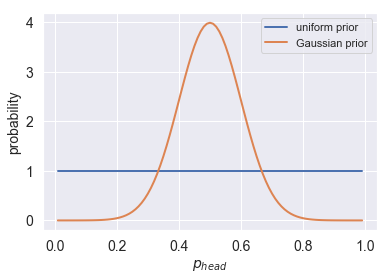

In [45]:
# specify the possible range of values for p_head (i.e. from 0 to 1)
p_heads = np.arange(0.01,1,0.01)

# uniform pdf is simply always one
uniform_pdf = np.ones(len(p_heads))

# use scipy's built in normal pdf to get gaussian pdf
gaussian_pdf = stats.norm.pdf(p_heads, loc=0.5, scale=0.1)

# plot uniform prior
plt.plot(p_heads, uniform_pdf)

# plot gaussian prior
plt.plot(p_heads, gaussian_pdf) 

plt.xlabel('$p_{head}$')
plt.ylabel('probability')
plt.legend(['uniform prior','Gaussian prior'])

## Calculating the likelihood

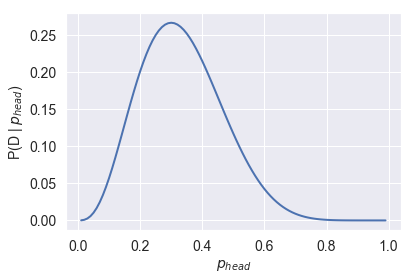

In [46]:
# calculate the number of ways to get n_heads from n_flips
n_choose_k = scipy.special.comb(n_flips,n_heads)

# likelihood as determined by the the binomial distribution
likelihood = n_choose_k * (p_heads**n_heads) * (1-p_heads)**(n_flips-n_heads)

plt.xlabel('$p_{head}$')
plt.ylabel('P(D | $p_{head}$)')
plt.plot(p_heads,likelihood)

## Calculating the posterior probability

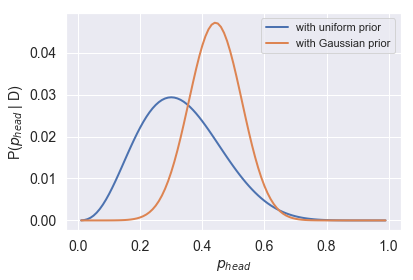

In [47]:
# calculate the posterior probabilities from likelihood and priors
uniform_posterior = likelihood * uniform_pdf
gaussian_posterior = likelihood * gaussian_pdf

# normalize the posterior probabilities
normed_uniform_post = uniform_posterior/sum(uniform_posterior)
normed_gaussian_post = gaussian_posterior/sum(gaussian_posterior)

# plot the posterior probabilities
plt.plot(p_heads, normed_uniform_post)
plt.plot(p_heads, normed_gaussian_post)
plt.xlabel('$p_{head}$')
plt.ylabel('P($p_{head}$ | D)')
plt.legend(['with uniform prior','with Gaussian prior'])

## Behavior as the number of coin flips increases

Using the code below, we can run it for varying values of `n_flips` and `p_head`, and watch as the posterior probability tightens up around the "true" value of $p_{head}$ as we increase the number of coin flips. 

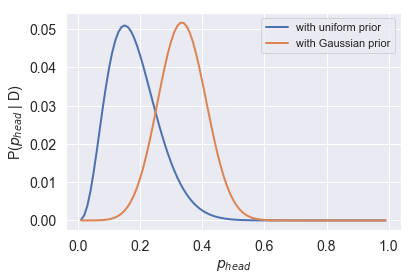

In [97]:
# create the "data"
n_flips = 20 # can't go above 1160
p_head = 0.3
n_heads = 0
for i in range(n_flips):  
    if coin_flip(p_head) == True:
        n_heads = n_heads + 1
    
# calculate the likelihood
n_choose_k = scipy.special.comb(n_flips,n_heads)
likelihood = n_choose_k * (p_heads**n_heads) * (1-p_heads)**(n_flips-n_heads)

# calculate the posteriors and normalize 
uniform_posterior = likelihood * uniform_pdf
gaussian_posterior = likelihood * gaussian_pdf
normed_uniform_post = uniform_posterior/sum(uniform_posterior)
normed_gaussian_post = gaussian_posterior/sum(gaussian_posterior)

# plot the posterior probabilities
plt.plot(p_heads, normed_uniform_post)
plt.plot(p_heads, normed_gaussian_post)
plt.xlabel('$p_{head}$')
plt.ylabel('P($p_{head}$ | D)')
plt.legend(['with uniform prior','with Gaussian prior'])